### Dans le cadre de recherches menées sur le cancer du sein, on est mandaté pour développer un modèle prédictif du caractère bénin ou malin de cellules prélevées sur le sein à l'aide d'une biopsie.

In [108]:
# Imports :
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display_html

# 1.  Analyse exploratoire des données. 

In [109]:
# Lecture du fichier .csv et suppression de la dernière colonne entièrement vide :
temp_df = pd.read_csv("breast_cancer.csv")
breast_cancer_df = temp_df.copy()
breast_cancer_df = breast_cancer_df.drop(columns = "Unnamed: 32")

In [110]:
# Affichage de quelques lignes du dataframe pour montrer sa structure :
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
# Affichage des types des différentes variables:
#breast_cancer_df.dtypes

# 1.1. Présentation des différentes variables de la base et de leur type.

- **"id"**/ int64 : identifiant de l'échantillon prélevé  
- **"diagnosis"** / object : diagnostique établi : M = malin, B = bénin  
- **"xxx_mean"** : valeur moyenne mesurée pour l'ensemble des cellules prélevées  
- **"xxx_se"** : écart-type de la marge d'erreur de mesure  
- **"xxx_worst"** : valeur mesurée la plus élevée  
- **"radius"** / float64 : rayon des cellules prélevées  
- **"texture"** / float64 : écart-type sur le niveau de gris des pixels composant l'image des cellules; pour une image de 8 bits, le niveau de gris minimum est de 0, le niveau maximum est de 255.  
- **"perimeter"** / float64 : périmètre des cellules prélevées  
- **"area"** / float64 : aire des cellules prélevées  
- **"smoothness"** / float64 : variation dans la mesure du rayon des cellules  
- **"compactness"** / float64 : (périmètre^2 / aire - 1.0)  
- **"concavity"** / float64 : degré d'irrégularité du contour des cellules  
- **"concave points"** / float64 : nombre de portions irrégulières sur le contour des cellules  
- **"symmetry"** / float64 : niveau de symétrie des cellules  
- **"fractal dimension"** / float64 : niveau d'irrégularité du contour des cellules prélevées par rapport aux cellules environnantes

# 1.2. Statistiques descriptives sur les variables en fonction de leur type.


Pour chacune des variables, on exécute un .describe() pour récupérer ses statistiques descriptives.

In [112]:
breast_cancer_df.loc[:, ["radius_mean", "radius_se", "radius_worst"]].describe()

,radius_mean,radius_se,radius_worst
count,569.000000,569.000000,569.000000
mean,14.127292,0.405172,16.269190
std,3.524049,0.277313,4.833242
min,6.981000,0.111500,7.930000
25%,11.700000,0.232400,13.010000
50%,13.370000,0.324200,14.970000
75%,15.780000,0.478900,18.790000
max,28.110000,2.873000,36.040000


In [113]:
breast_cancer_df.loc[:, ["texture_mean", "texture_se", "texture_worst"]].describe()

,texture_mean,texture_se,texture_worst
count,569.000000,569.000000,569.000000
mean,19.289649,1.216853,25.677223
std,4.301036,0.551648,6.146258
min,9.710000,0.360200,12.020000
25%,16.170000,0.833900,21.080000
50%,18.840000,1.108000,25.410000
75%,21.800000,1.474000,29.720000
max,39.280000,4.885000,49.540000


In [114]:
breast_cancer_df.loc[:, ["perimeter_mean", "perimeter_se", "perimeter_worst"]].describe()

,perimeter_mean,perimeter_se,perimeter_worst
count,569.000000,569.000000,569.000000
mean,91.969033,2.866059,107.261213
std,24.298981,2.021855,33.602542
min,43.790000,0.757000,50.410000
25%,75.170000,1.606000,84.110000
50%,86.240000,2.287000,97.660000
75%,104.100000,3.357000,125.400000
max,188.500000,21.980000,251.200000


In [115]:
breast_cancer_df.loc[:, ["area_mean", "area_se", "area_worst"]].describe()

,area_mean,area_se,area_worst
count,569.000000,569.000000,569.000000
mean,654.889104,40.337079,880.583128
std,351.914129,45.491006,569.356993
min,143.500000,6.802000,185.200000
25%,420.300000,17.850000,515.300000
50%,551.100000,24.530000,686.500000
75%,782.700000,45.190000,1084.000000
max,2501.000000,542.200000,4254.000000


In [116]:
breast_cancer_df.loc[:, ["smoothness_mean", "smoothness_se", "smoothness_worst"]].describe()

,smoothness_mean,smoothness_se,smoothness_worst
count,569.000000,569.000000,569.000000
mean,0.096360,0.007041,0.132369
std,0.014064,0.003003,0.022832
min,0.052630,0.001713,0.071170
25%,0.086370,0.005169,0.116600
50%,0.095870,0.006380,0.131300
75%,0.105300,0.008146,0.146000
max,0.163400,0.031130,0.222600


In [117]:
breast_cancer_df.loc[:, ["compactness_mean", "compactness_se", "compactness_worst"]].describe()

,compactness_mean,compactness_se,compactness_worst
count,569.000000,569.000000,569.000000
mean,0.104341,0.025478,0.254265
std,0.052813,0.017908,0.157336
min,0.019380,0.002252,0.027290
25%,0.064920,0.013080,0.147200
50%,0.092630,0.020450,0.211900
75%,0.130400,0.032450,0.339100
max,0.345400,0.135400,1.058000


In [118]:
breast_cancer_df.loc[:, ["concavity_mean", "concavity_se", "concavity_worst"]].describe()

,concavity_mean,concavity_se,concavity_worst
count,569.000000,569.000000,569.000000
mean,0.088799,0.031894,0.272188
std,0.079720,0.030186,0.208624
min,0.000000,0.000000,0.000000
25%,0.029560,0.015090,0.114500
50%,0.061540,0.025890,0.226700
75%,0.130700,0.042050,0.382900
max,0.426800,0.396000,1.252000


In [119]:
breast_cancer_df.loc[:, ["concave points_mean", "concave points_se", "concave points_worst"]].describe()

,concave points_mean,concave points_se,concave points_worst
count,569.000000,569.000000,569.000000
mean,0.048919,0.011796,0.114606
std,0.038803,0.006170,0.065732
min,0.000000,0.000000,0.000000
25%,0.020310,0.007638,0.064930
50%,0.033500,0.010930,0.099930
75%,0.074000,0.014710,0.161400
max,0.201200,0.052790,0.291000


In [120]:
breast_cancer_df.loc[:, ["symmetry_mean", "symmetry_se", "symmetry_worst"]].describe()

,symmetry_mean,symmetry_se,symmetry_worst
count,569.000000,569.000000,569.000000
mean,0.181162,0.020542,0.290076
std,0.027414,0.008266,0.061867
min,0.106000,0.007882,0.156500
25%,0.161900,0.015160,0.250400
50%,0.179200,0.018730,0.282200
75%,0.195700,0.023480,0.317900
max,0.304000,0.078950,0.663800


In [121]:
breast_cancer_df.loc[:, ["fractal_dimension_mean", "fractal_dimension_se", "fractal_dimension_worst"]].describe()

,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
count,569.000000,569.000000,569.000000
mean,0.062798,0.003795,0.083946
std,0.007060,0.002646,0.018061
min,0.049960,0.000895,0.055040
25%,0.057700,0.002248,0.071460
50%,0.061540,0.003187,0.080040
75%,0.066120,0.004558,0.092080
max,0.097440,0.029840,0.207500


# 1.3. Statistiques descriptives sur les variables en fonction du diagnostic (bénin/malin), permettant de mettre en évidence leur caractère plus ou moins discriminant.

Pour chacune des variables, on exécute un .describe() pour récupérer ses statistiques descriptives suivant le diagnostique établi (bénin ou malin).

In [122]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("color", 'black')])]

In [123]:
radius_df=breast_cancer_df.loc[:, ["diagnosis", "radius_mean", "radius_se", "radius_worst"]]

radius_B_df = radius_df[radius_df['diagnosis']=='B']
radius_M_df = radius_df[radius_df['diagnosis']=='M']

df1_styler = radius_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('radius for B diagnosis').set_table_styles(styles)
df2_styler = radius_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('radius for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,radius_mean,radius_se,radius_worst
count,357.000000,357.000000,357.000000
mean,12.146524,0.284082,13.379801
std,1.780512,0.112570,1.981368
min,6.981000,0.111500,7.930000
25%,11.080000,0.207300,12.080000
50%,12.200000,0.257500,13.350000
75%,13.370000,0.341600,14.800000
max,17.850000,0.881100,19.820000
,radius_mean,radius_se,radius_worst
count,212.000000,212.000000,212.000000


In [124]:
texture_df=breast_cancer_df.loc[:, ["diagnosis", "texture_mean", "texture_se", "texture_worst"]]

texture_B_df = texture_df[texture_df['diagnosis']=='B']
texture_M_df = texture_df[texture_df['diagnosis']=='M']

df1_styler = texture_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('texture for B diagnosis').set_table_styles(styles)
df2_styler = texture_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('texture for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,texture_mean,texture_se,texture_worst
count,357.000000,357.000000,357.000000
mean,17.914762,1.220380,23.515070
std,3.995125,0.589180,5.493955
min,9.710000,0.360200,12.020000
25%,15.150000,0.795900,19.580000
50%,17.390000,1.108000,22.820000
75%,19.760000,1.492000,26.510000
max,33.810000,4.885000,41.780000
,texture_mean,texture_se,texture_worst
count,212.000000,212.000000,212.000000


In [125]:
perimeter_df=breast_cancer_df.loc[:, ["diagnosis", "perimeter_mean", "perimeter_se", "perimeter_worst"]]

perimeter_B_df = perimeter_df[perimeter_df['diagnosis']=='B']
perimeter_M_df = perimeter_df[perimeter_df['diagnosis']=='M']

df1_styler = perimeter_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('perimeter for B diagnosis').set_table_styles(styles)
df2_styler = perimeter_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('perimeter for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,perimeter_mean,perimeter_se,perimeter_worst
count,357.000000,357.000000,357.000000
mean,78.075406,2.000321,87.005938
std,11.807438,0.771169,13.527091
min,43.790000,0.757000,50.410000
25%,70.870000,1.445000,78.270000
50%,78.180000,1.851000,86.920000
75%,86.100000,2.388000,96.590000
max,114.600000,5.118000,127.100000
,perimeter_mean,perimeter_se,perimeter_worst
count,212.000000,212.000000,212.000000


In [126]:
area_df=breast_cancer_df.loc[:, ["diagnosis", "area_mean", "area_se", "area_worst"]]

area_B_df = area_df[area_df['diagnosis']=='B']
area_M_df = area_df[area_df['diagnosis']=='M']

df1_styler = area_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('area for B diagnosis').set_table_styles(styles)
df2_styler = area_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('area for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,area_mean,area_se,area_worst
count,357.000000,357.000000,357.000000
mean,462.790196,21.135148,558.899440
std,134.287118,8.843472,163.601424
min,143.500000,6.802000,185.200000
25%,378.200000,15.260000,447.100000
50%,458.400000,19.630000,547.400000
75%,551.100000,25.030000,670.000000
max,992.100000,77.110000,1210.000000
,area_mean,area_se,area_worst
count,212.000000,212.000000,212.000000


In [127]:
smoothness_df=breast_cancer_df.loc[:, ["diagnosis", "smoothness_mean", "smoothness_se", "smoothness_worst"]]

smoothness_B_df = smoothness_df[smoothness_df['diagnosis']=='B']
smoothness_M_df = smoothness_df[smoothness_df['diagnosis']=='M']

df1_styler = smoothness_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('smoothness for B diagnosis').set_table_styles(styles)
df2_styler = smoothness_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('smoothness for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,smoothness_mean,smoothness_se,smoothness_worst
count,357.000000,357.000000,357.000000
mean,0.092478,0.007196,0.124959
std,0.013446,0.003061,0.020013
min,0.052630,0.001713,0.071170
25%,0.083060,0.005212,0.110400
50%,0.090760,0.006530,0.125400
75%,0.100700,0.008534,0.137600
max,0.163400,0.021770,0.200600
,smoothness_mean,smoothness_se,smoothness_worst
count,212.000000,212.000000,212.000000


In [128]:
compactness_df=breast_cancer_df.loc[:, ["diagnosis", "compactness_mean", "compactness_se", "compactness_worst"]]

compactness_B_df = compactness_df[compactness_df['diagnosis']=='B']
compactness_M_df = compactness_df[compactness_df['diagnosis']=='M']

df1_styler = compactness_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('compactness for B diagnosis').set_table_styles(styles)
df2_styler = compactness_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('compactness for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,compactness_mean,compactness_se,compactness_worst
count,357.000000,357.000000,357.000000
mean,0.080085,0.021438,0.182673
std,0.033750,0.016352,0.092180
min,0.019380,0.002252,0.027290
25%,0.055620,0.011320,0.112000
50%,0.075290,0.016310,0.169800
75%,0.097550,0.025890,0.230200
max,0.223900,0.106400,0.584900
,compactness_mean,compactness_se,compactness_worst
count,212.000000,212.000000,212.000000


In [129]:
concavity_df=breast_cancer_df.loc[:, ["diagnosis", "concavity_mean", "concavity_se", "concavity_worst"]]

concavity_B_df = concavity_df[concavity_df['diagnosis']=='B']
concavity_M_df = concavity_df[concavity_df['diagnosis']=='M']

df1_styler = concavity_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('concavity for B diagnosis').set_table_styles(styles)
df2_styler = concavity_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('concavity for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,concavity_mean,concavity_se,concavity_worst
count,357.000000,357.000000,357.000000
mean,0.046058,0.025997,0.166238
std,0.043442,0.032918,0.140368
min,0.000000,0.000000,0.000000
25%,0.020310,0.010990,0.077080
50%,0.037090,0.018400,0.141200
75%,0.059990,0.030560,0.221600
max,0.410800,0.396000,1.252000
,concavity_mean,concavity_se,concavity_worst
count,212.000000,212.000000,212.000000


In [130]:
concave_points_df=breast_cancer_df.loc[:, ["diagnosis", "concave points_mean", "concave points_se", "concave points_worst"]]

concave_points_B_df = concave_points_df[concave_points_df['diagnosis']=='B']
concave_points_M_df = concave_points_df[concave_points_df['diagnosis']=='M']

df1_styler = concave_points_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('concave points for B diagnosis').set_table_styles(styles)
df2_styler = concave_points_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('concave points for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,concave points_mean,concave points_se,concave points_worst
count,357.000000,357.000000,357.000000
mean,0.025717,0.009858,0.074444
std,0.015909,0.005709,0.035797
min,0.000000,0.000000,0.000000
25%,0.015020,0.006433,0.051040
50%,0.023440,0.009061,0.074310
75%,0.032510,0.011870,0.097490
max,0.085340,0.052790,0.175000
,concave points_mean,concave points_se,concave points_worst
count,212.000000,212.000000,212.000000


In [131]:
symmetry_df=breast_cancer_df.loc[:, ["diagnosis", "symmetry_mean", "symmetry_se", "symmetry_worst"]]

symmetry_B_df = symmetry_df[symmetry_df['diagnosis']=='B']
symmetry_M_df = symmetry_df[symmetry_df['diagnosis']=='M']

df1_styler = symmetry_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('symmetry for B diagnosis').set_table_styles(styles)
df2_styler = symmetry_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('symmetry for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,symmetry_mean,symmetry_se,symmetry_worst
count,357.000000,357.000000,357.000000
mean,0.174186,0.020584,0.270246
std,0.024807,0.006999,0.041745
min,0.106000,0.009539,0.156600
25%,0.158000,0.015600,0.240600
50%,0.171400,0.019090,0.268700
75%,0.189000,0.024060,0.298300
max,0.274300,0.061460,0.422800
,symmetry_mean,symmetry_se,symmetry_worst
count,212.000000,212.000000,212.000000


In [132]:
fractal_dimension_df=breast_cancer_df.loc[:, ["diagnosis", "fractal_dimension_mean", "fractal_dimension_se", "fractal_dimension_worst"]]

fractal_dimension_B_df = fractal_dimension_df[fractal_dimension_df['diagnosis']=='B']
fractal_dimension_M_df = fractal_dimension_df[fractal_dimension_df['diagnosis']=='M']

df1_styler = fractal_dimension_B_df.describe().style.set_table_attributes("style='display:inline'").set_caption('fractal_dimension for B diagnosis').set_table_styles(styles)
df2_styler = fractal_dimension_M_df.describe().style.set_table_attributes("style='display:inline'").set_caption('fractal_dimension for M diagnosis').set_table_styles(styles)

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
count,357.000000,357.000000,357.000000
mean,0.062867,0.003636,0.079442
std,0.006747,0.002938,0.013804
min,0.051850,0.000895,0.055210
25%,0.058530,0.002074,0.070090
50%,0.061540,0.002808,0.077120
75%,0.065760,0.004174,0.085410
max,0.095750,0.029840,0.148600
,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
count,212.000000,212.000000,212.000000


Pour chacune des variables, on calcule le ratio entre les valeurs moyennes de la variable suivant le diagnostique établi (bénin ou malin). 

In [143]:
print(f'ratio rayon moy M par rapport à rayon moy B : {int(radius_M_df["radius_mean"].mean()/radius_B_df["radius_mean"].mean()*100)} %')
print(f'ratio texture moy M par rapport à texture moy B : {int(texture_M_df["texture_mean"].mean()/texture_B_df["texture_mean"].mean()*100)} %')
print(f'ratio périmètre moy  M par rapport à périmètre moy B : {int(perimeter_M_df["perimeter_mean"].mean()/perimeter_B_df["perimeter_mean"].mean()*100)} %')
print(f'ratio aire moy M par rapport à aire moy B : {int(area_M_df["area_mean"].mean()/area_B_df["area_mean"].mean()*100)} %')
print(f'ratio smoothness moy M par rapport à smoothness moy B : {int(smoothness_M_df["smoothness_mean"].mean()/smoothness_B_df["smoothness_mean"].mean()*100)} %')
print(f'ratio compactness moy M par rapport à compactness moy B : {int(compactness_M_df["compactness_mean"].mean()/compactness_B_df["compactness_mean"].mean()*100)}%')
print(f'ratio concavité moy M par rapport à concavité moy B : {int(concavity_M_df["concavity_mean"].mean()/concavity_B_df["concavity_mean"].mean()*100)}%')
print(f'ratio points concaves moy M par rapport à points concaves moy B : {int(concave_points_M_df["concave points_mean"].mean()/concave_points_B_df["concave points_mean"].mean()*100)}%')
print(f'ratio symétrie moy M par rapport à symétrie moy B : {int(symmetry_M_df["symmetry_mean"].mean()/symmetry_B_df["symmetry_mean"].mean()*100)}%')
print(f'ratio fractal dimension moy M par rapport à fractal dimension moy B : {int(fractal_dimension_M_df["fractal_dimension_mean"].mean()/fractal_dimension_B_df["fractal_dimension_mean"].mean()*100)}%')

ratio rayon moy M par rapport à rayon moy B : 143 %
ratio texture moy M par rapport à texture moy B : 120 %
ratio périmètre moy  M par rapport à périmètre moy B : 147 %
ratio aire moy M par rapport à aire moy B : 211 %
ratio smoothness moy M par rapport à smoothness moy B : 111 %
ratio compactness moy M par rapport à compactness moy B : 181%
ratio concavité moy M par rapport à concavité moy B : 349%
ratio points concaves moy M par rapport à points concaves moy B : 342%
ratio symétrie moy M par rapport à symétrie moy B : 110%
ratio fractal dimension moy M par rapport à fractal dimension moy B : 99%


Pour chacune des variables, on calcule le ratio entre les valeurs "worst" de la variable suivant le diagnostique établi (bénin ou malin). 

In [134]:
print(f'ratio worst rayon M par rapport à worst rayon B : {int(radius_M_df["radius_worst"].mean()/radius_B_df["radius_worst"].mean()*100)} %')
print(f'ratio worst texture M par rapport à worst texture B : {int(texture_M_df["texture_worst"].mean()/texture_B_df["texture_worst"].mean()*100)} %')
print(f'ratio worst périmètre M par rapport à worst périmètre B : {int(perimeter_M_df["perimeter_worst"].mean()/perimeter_B_df["perimeter_worst"].mean()*100)} %')
print(f'ratio worst aire M par rapport à worst aire B : {int(area_M_df["area_worst"].mean()/area_B_df["area_worst"].mean()*100)} %')
print(f'ratio worst smoothness M par rapport à worst smoothness B : {int(smoothness_M_df["smoothness_worst"].mean()/smoothness_B_df["smoothness_worst"].mean()*100)} %')
print(f'ratio worst compactness M par rapport à worst compactness B : {int(compactness_M_df["compactness_worst"].mean()/compactness_B_df["compactness_worst"].mean()*100)}%')
print(f'ratio worst concavité M par rapport à worst concavité B : {int(concavity_M_df["concavity_worst"].mean()/concavity_B_df["concavity_worst"].mean()*100)}%')
print(f'ratio worst points concaves M par rapport à worst points concaves B : {int(concave_points_M_df["concave points_worst"].mean()/concave_points_B_df["concave points_worst"].mean()*100)}%')
print(f'ratio worst symétrie M par rapport à worst symétrie B : {int(symmetry_M_df["symmetry_worst"].mean()/symmetry_B_df["symmetry_worst"].mean()*100)}%')
print(f'ratio worst fractal dimension M par rapport à worst fractal dimension B : {int(fractal_dimension_M_df["fractal_dimension_worst"].mean()/fractal_dimension_B_df["fractal_dimension_worst"].mean()*100)}%')

ratio worst rayon M par rapport à worst rayon B : 157 %
ratio worst texture M par rapport à worst texture B : 124 %
ratio worst périmètre M par rapport à worst périmètre B : 162 %
ratio worst aire M par rapport à worst aire B : 254 %
ratio worst smoothness M par rapport à worst smoothness B : 115 %
ratio worst compactness M par rapport à worst compactness B : 205%
ratio worst concavité M par rapport à worst concavité B : 271%
ratio worst points concaves M par rapport à worst points concaves B : 244%
ratio worst symétrie M par rapport à worst symétrie B : 119%
ratio worst fractal dimension M par rapport à worst fractal dimension B : 115%


Pour chacune des variables, on calcule l'impact de la marge d'erreur sur la mesure moyenne de la variable. 

In [135]:
print(f'ratio marge erreur rayon par rapport à rayon moy : {int(radius_df["radius_se"].mean()/radius_df["radius_mean"].mean()*100)} %')
print(f'ratio marge erreur texture par rapport à texture moy : {int(texture_df["texture_se"].mean()/texture_df["texture_mean"].mean()*100)} %')
print(f'ratio marge erreur périmètre par rapport à périmètre moy : {int(perimeter_df["perimeter_se"].mean()/perimeter_df["perimeter_mean"].mean()*100)} %')
print(f'ratio marge erreur aire par rapport à aire moy : {int(area_df["area_se"].mean()/area_df["area_mean"].mean()*100)} %')
print(f'ratio marge erreur smoothness par rapport à smoothness moy : {int(smoothness_df["smoothness_se"].mean()/smoothness_df["smoothness_mean"].mean()*100)} %')
print(f'ratio marge erreur compactness par rapport à compactness moy : {int(compactness_df["compactness_se"].mean()/compactness_df["compactness_mean"].mean()*100)}%')
print(f'ratio marge erreur concavité par rapport à concavité moy : {int(concavity_df["concavity_se"].mean()/concavity_df["concavity_mean"].mean()*100)}%')
print(f'ratio marge erreur points concaves par rapport à points concaves moy : {int(concave_points_df["concave points_se"].mean()/concave_points_df["concave points_mean"].mean()*100)}%')
print(f'ratio marge erreur symétrie par rapport à symétrie moy : {int(symmetry_df["symmetry_se"].mean()/symmetry_df["symmetry_mean"].mean()*100)}%')
print(f'ratio marge erreur fractal dimension par rapport à fractal dimension moy : {int(fractal_dimension_df["fractal_dimension_se"].mean()/fractal_dimension_df["fractal_dimension_mean"].mean()*100)}%')

ratio marge erreur rayon par rapport à rayon moy : 2 %
ratio marge erreur texture par rapport à texture moy : 6 %
ratio marge erreur périmètre par rapport à périmètre moy : 3 %
ratio marge erreur aire par rapport à aire moy : 6 %
ratio marge erreur smoothness par rapport à smoothness moy : 7 %
ratio marge erreur compactness par rapport à compactness moy : 24%
ratio marge erreur concavité par rapport à concavité moy : 35%
ratio marge erreur points concaves par rapport à points concaves moy : 24%
ratio marge erreur symétrie par rapport à symétrie moy : 11%
ratio marge erreur fractal dimension par rapport à fractal dimension moy : 6%


Pour chacune des variables, on calcule l'impact de la marge d'erreur sur la mesure "worst" de la variable. 

In [136]:
print(f'ratio marge erreur rayon par rapport à rayon worst : {int(radius_df["radius_se"].mean()/radius_df["radius_worst"].mean()*100)} %')
print(f'ratio marge erreur texture par rapport à texture worst : {int(texture_df["texture_se"].mean()/texture_df["texture_worst"].mean()*100)} %')
print(f'ratio marge erreur périmètre par rapport à périmètre worst : {int(perimeter_df["perimeter_se"].mean()/perimeter_df["perimeter_worst"].mean()*100)} %')
print(f'ratio marge erreur aire par rapport à aire worst : {int(area_df["area_se"].mean()/area_df["area_worst"].mean()*100)} %')
print(f'ratio marge erreur smoothness par rapport à smoothness worst : {int(smoothness_df["smoothness_se"].mean()/smoothness_df["smoothness_worst"].mean()*100)} %')
print(f'ratio marge erreur compactness par rapport à compactness worst : {int(compactness_df["compactness_se"].mean()/compactness_df["compactness_worst"].mean()*100)}%')
print(f'ratio marge erreur concavité par rapport à concavité worst : {int(concavity_df["concavity_se"].mean()/concavity_df["concavity_worst"].mean()*100)}%')
print(f'ratio marge erreur points concaves par rapport à points concaves worst : {int(concave_points_df["concave points_se"].mean()/concave_points_df["concave points_worst"].mean()*100)}%')
print(f'ratio marge erreur symétrie par rapport à symétrie worst : {int(symmetry_df["symmetry_se"].mean()/symmetry_df["symmetry_worst"].mean()*100)}%')
print(f'ratio marge erreur fractal dimension par rapport à fractal dimension worst : {int(fractal_dimension_df["fractal_dimension_se"].mean()/fractal_dimension_df["fractal_dimension_worst"].mean()*100)}%')

ratio marge erreur rayon par rapport à rayon worst : 2 %
ratio marge erreur texture par rapport à texture worst : 4 %
ratio marge erreur périmètre par rapport à périmètre worst : 2 %
ratio marge erreur aire par rapport à aire worst : 4 %
ratio marge erreur smoothness par rapport à smoothness worst : 5 %
ratio marge erreur compactness par rapport à compactness worst : 10%
ratio marge erreur concavité par rapport à concavité worst : 11%
ratio marge erreur points concaves par rapport à points concaves worst : 10%
ratio marge erreur symétrie par rapport à symétrie worst : 7%
ratio marge erreur fractal dimension par rapport à fractal dimension worst : 4%


Grâce aux calculs précédents, on identifie des variables dont la mesure ne varie quasiment pas en fonction du diagnotique établi :  
- fractal dimension  
- smoothness  
- symmetry  
  
Les mesures des autres variables varient significativement en fonction du diagnotique établi, nous permettant ainsi de sélectionner les plus discriminantes et ayant une marge d'erreur acceptable.  
Par exemple, on ne retiendra pas la concavité moyenne pour laquelle la marge d'erreur est de 35%, donc non négligeable.  
A l'inverse, on retiendra le nombre de points concaves "worst" pour lequel la marge d'erreur est de 10%, donc acceptable.  
  
Au final, on retient les variables suivantes:  
- radius mean ou worst  
- perimeter mean ou worst  
- area mean ou worst  
- concave points worst  
- concavity worst

# 1.4. Illustration à l'aide de graphiques des variables les plus discriminantes.

On va à présent représenter graphiquement l'évolution en abscisse des variables discriminantes déterminées précédemment en fonction en ordonnée des variables stables suivant le diagnostique établi.

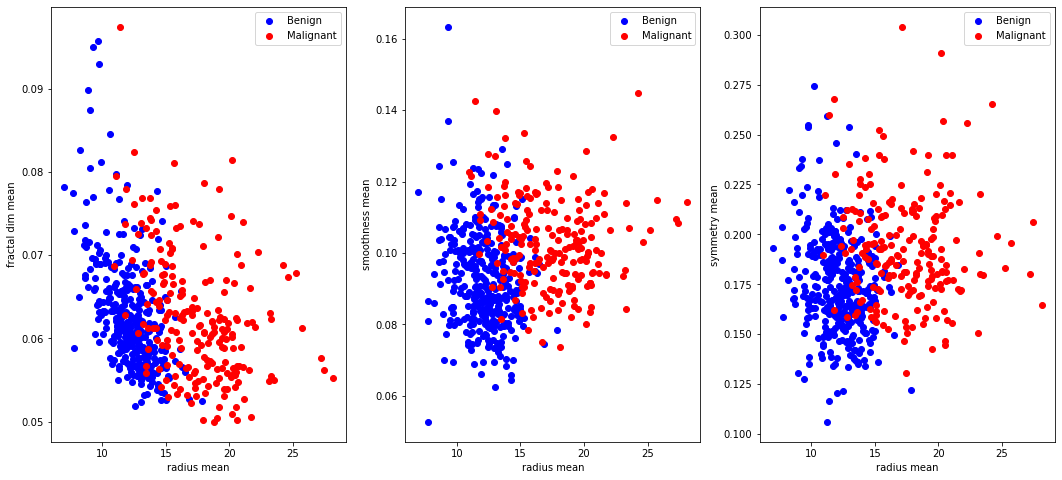

In [137]:
#graphes radius mean
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(radius_B_df['radius_mean'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(radius_M_df['radius_mean'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('radius mean')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(radius_B_df['radius_mean'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(radius_M_df['radius_mean'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('radius mean')
ax2.set_ylabel('smoothness mean')

ax3.scatter(radius_B_df['radius_mean'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(radius_M_df['radius_mean'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('radius mean')
ax3.set_ylabel('symmetry mean')

plt.show()

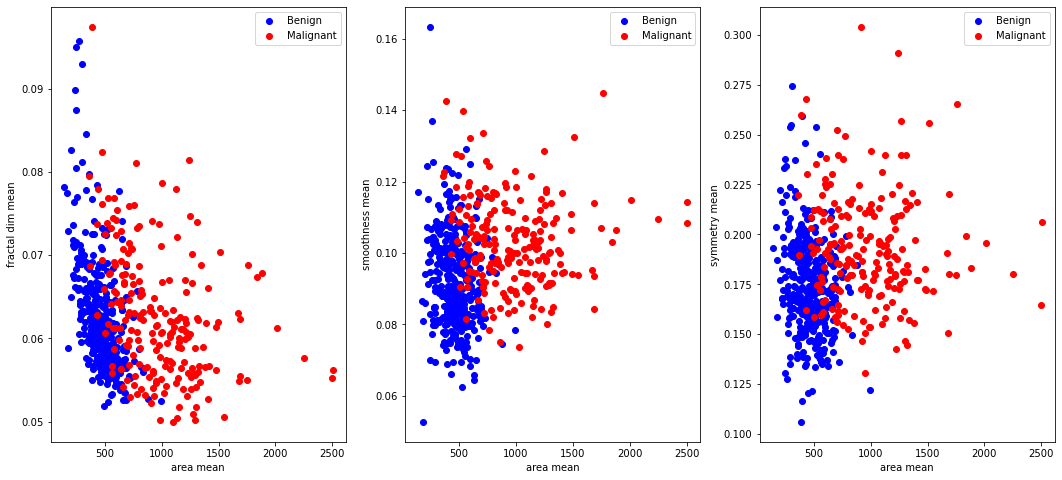

In [138]:
#graphes area mean
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(area_B_df['area_mean'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(area_M_df['area_mean'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('area mean')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(area_B_df['area_mean'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(area_M_df['area_mean'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('area mean')
ax2.set_ylabel('smoothness mean')

ax3.scatter(area_B_df['area_mean'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(area_M_df['area_mean'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('area mean')
ax3.set_ylabel('symmetry mean')

plt.show()

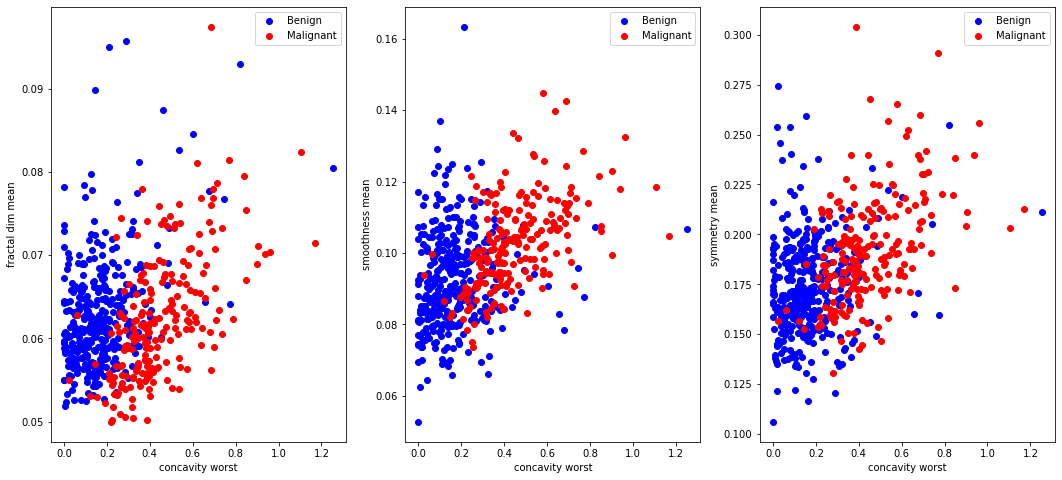

In [139]:
#graphes concavity worst
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(concavity_B_df['concavity_worst'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(concavity_M_df['concavity_worst'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('concavity worst')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(concavity_B_df['concavity_worst'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(concavity_M_df['concavity_worst'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('concavity worst')
ax2.set_ylabel('smoothness mean')

ax3.scatter(concavity_B_df['concavity_worst'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(concavity_M_df['concavity_worst'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('concavity worst')
ax3.set_ylabel('symmetry mean')

plt.show()

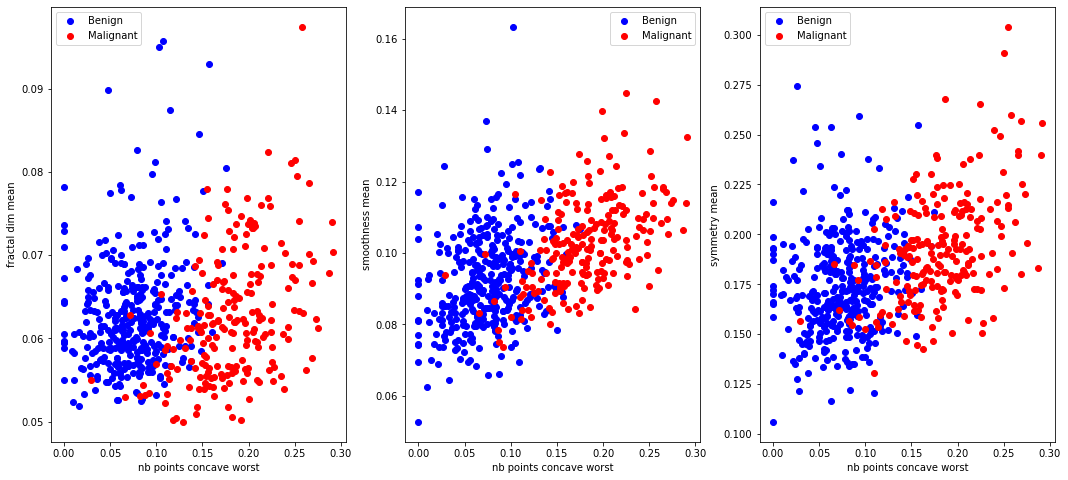

In [140]:
#graphes nb points concaves worst
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(concave_points_B_df['concave points_worst'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(concave_points_M_df['concave points_worst'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('nb points concave worst')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(concave_points_B_df['concave points_worst'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(concave_points_M_df['concave points_worst'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('nb points concave worst')
ax2.set_ylabel('smoothness mean')

ax3.scatter(concave_points_B_df['concave points_worst'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(concave_points_M_df['concave points_worst'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('nb points concave worst')
ax3.set_ylabel('symmetry mean')

plt.show()

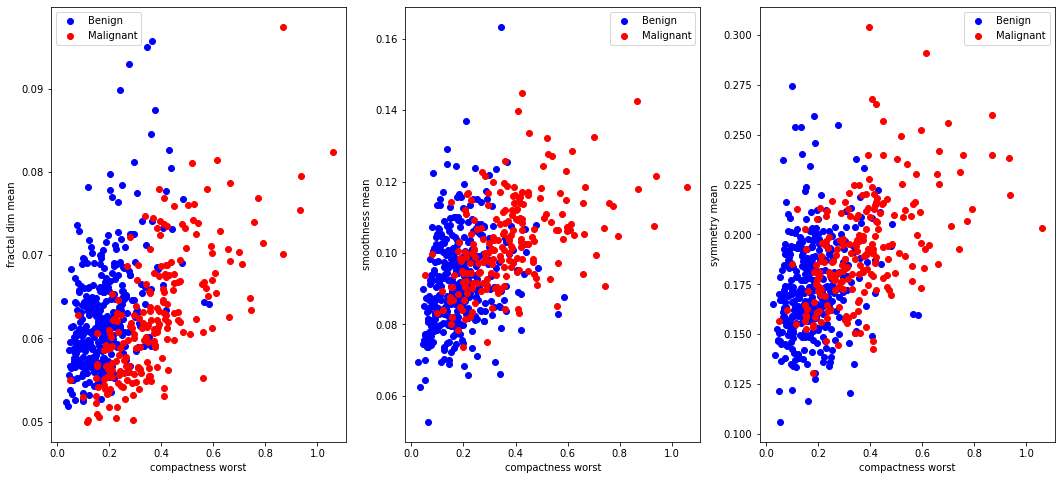

In [141]:
#graphes compactness worst
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(compactness_B_df['compactness_worst'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(compactness_M_df['compactness_worst'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('compactness worst')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(compactness_B_df['compactness_worst'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(compactness_M_df['compactness_worst'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('compactness worst')
ax2.set_ylabel('smoothness mean')

ax3.scatter(compactness_B_df['compactness_worst'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(compactness_M_df['compactness_worst'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('compactness worst')
ax3.set_ylabel('symmetry mean')

plt.show()

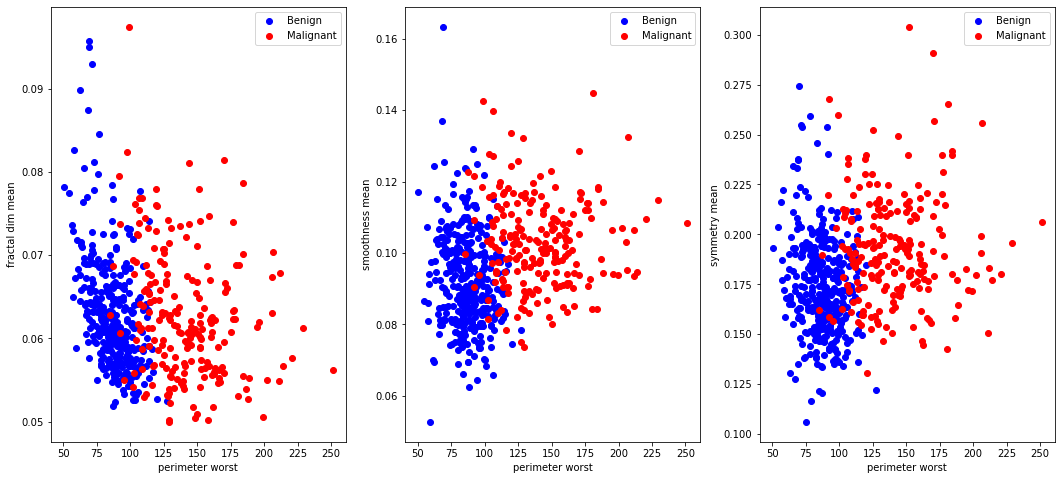

In [142]:
#graphes perimeter worst
graphe=plt.figure(figsize=(18,8))
ax1=graphe.add_subplot(1,3,1)
ax2=graphe.add_subplot(1,3,2)
ax3=graphe.add_subplot(1,3,3)

ax1.scatter(perimeter_B_df['perimeter_worst'], fractal_dimension_B_df['fractal_dimension_mean'], color='blue', label='Benign')
ax1.scatter(perimeter_M_df['perimeter_worst'], fractal_dimension_M_df['fractal_dimension_mean'], color='red', label='Malignant')
ax1.legend()
ax1.set_xlabel('perimeter worst')
ax1.set_ylabel('fractal dim mean')

ax2.scatter(perimeter_B_df['perimeter_worst'], smoothness_B_df['smoothness_mean'], color='blue', label='Benign')
ax2.scatter(perimeter_M_df['perimeter_worst'], smoothness_M_df['smoothness_mean'], color='red', label='Malignant')
ax2.legend()
ax2.set_xlabel('perimeter worst')
ax2.set_ylabel('smoothness mean')

ax3.scatter(perimeter_B_df['perimeter_worst'], symmetry_B_df['symmetry_mean'], color='blue', label='Benign')
ax3.scatter(perimeter_M_df['perimeter_worst'], symmetry_M_df['symmetry_mean'], color='red', label='Malignant')
ax3.legend()
ax3.set_xlabel('perimeter worst')
ax3.set_ylabel('symmetry mean')

plt.show()